Question 1:

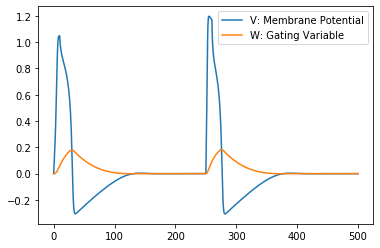

In [13]:
from scipy.integrate import solve_ivp
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np

def FHN(t,z):
    alpha=0.1
    gamma=1
    beta=0.01
    I=0.0
    if (t>=0 and t<10):
        I=0.1
    elif (t>=250 and t<260):
        I=0.3
    V,W=z
    f1=-V*(V-1)*(V-alpha)-W+I
    f2=beta*(V-gamma*W)
    return[f1,f2]

sol = solve_ivp(FHN, [0, 500], [0, 0],'BDF',rtol=.0001)

plt.plot(sol.t,sol.y[0,:],sol.t,sol.y[1,:])
plt.legend(['V: Membrane Potential','W: Gating Variable'])

Question 2:

RK45 rtol 0.01:  0.03789687156677246
RK45 rtol 0.001:  0.43782949447631836
LSODA rtol 0.01:  0.000997304916381836
LSODA rtol 0.001:  0.0019941329956054688


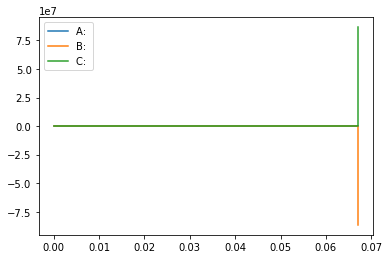

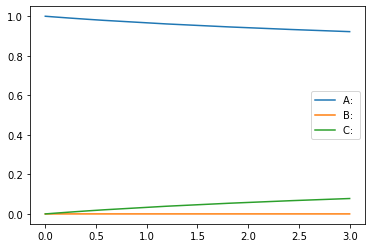

In [19]:
import time

def CheK(t,Z):
    k1=0.04
    k2=10000
    k3=30000000
    A,B,C=Z
    f1=(-k1*A)+(k2*B*C)
    f2=k1*A-(k2*B*C)-(k3*B**2)
    f3=k3*B**2
    return [f1,f2,f3]

t0=time.time()
sol1 = solve_ivp(CheK, [0, 3], [1, 0, 0],'RK45',rtol=.01)
t_RK45_rtol1=time.time()-t0
t0=time.time()
sol2 = solve_ivp(CheK, [0, 3], [1, 0, 0],'RK45',rtol=.001)
t_RK45_rtol2=time.time()-t0
t0=time.time()
sol3 = solve_ivp(CheK, [0, 3], [1, 0, 0],'LSODA',rtol=.01)
t_RKLSODA_rtol1=time.time()-t0
t0=time.time()
sol4 = solve_ivp(CheK, [0, 3], [1, 0, 0],'LSODA',rtol=.001)
t_RKLSODA_rtol2=time.time()-t0

print('RK45 rtol 0.01: ',t_RK45_rtol1)
print('RK45 rtol 0.001: ',t_RK45_rtol2)
print('LSODA rtol 0.01: ',t_RKLSODA_rtol1)
print('LSODA rtol 0.001: ',t_RKLSODA_rtol2)

plt.figure(1)
plt.plot(sol1.t,sol1.y[0,:],sol1.t,sol1.y[1,:],sol1.t,sol1.y[2,:])
plt.legend(['A: ','B: ','C: '])

plt.figure(2)
plt.plot(sol3.t,sol3.y[0,:],sol3.t,sol3.y[1,:],sol3.t,sol3.y[2,:])
plt.legend(['A: ','B: ','C: '])

Question 3:

Initial Conditions [0, 1, 0] at t=100
y1 : -7.226565783664905
y2 : -6.940947163226859
y3 : 25.893835681773275
Initial Conditions [0, 2, 0] at t=100
y1 : -8.37372534993913
y2 : -7.050718015924987
y3 : 28.522357095849983


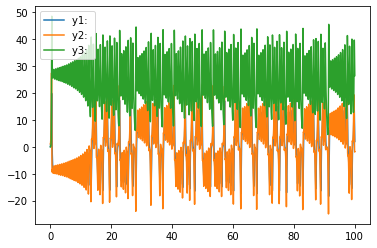

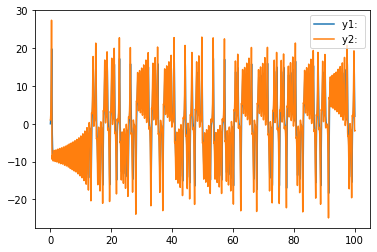

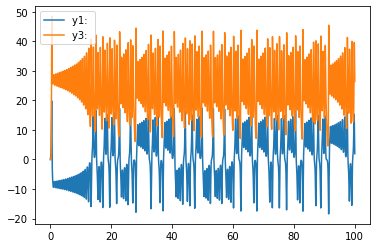

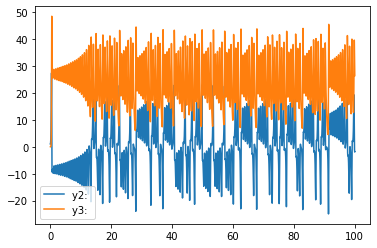

In [4]:
def Climate(t,Z):
    sigma=10
    b=8/3
    r=28
    y1,y2,y3=Z
    f1=sigma*(y2-y1)
    f2=(r*y1)-y2-(y1*y3)
    f3=y1*y2-(b*y3)
    return [f1,f2,f3]

sol1 = solve_ivp(Climate, [0, 100], [0, 1, 0],'BDF',rtol=.001)
plt.figure(3)
plt.plot(sol1.t,sol1.y[0,:],sol1.t,sol1.y[1,:],sol1.t,sol1.y[2,:])
plt.legend(['y1: ','y2: ','y3: '])

plt.figure(4)
plt.plot(sol1.t,sol1.y[0,:],sol1.t,sol1.y[1,:])
plt.legend(['y1: ','y2: '])

plt.figure(5)
plt.plot(sol1.t,sol1.y[0,:],sol1.t,sol1.y[2,:])
plt.legend(['y1: ','y3: '])

plt.figure(6)
plt.plot(sol1.t,sol1.y[1,:],sol1.t,sol1.y[2,:])
plt.legend(['y2: ','y3: '])

print("Initial Conditions [0, 1, 0] at t=100")
print("y1 :", sol1.y[0,100])
print("y2 :", sol1.y[1,100])
print("y3 :", sol1.y[2,100])

sol1 = solve_ivp(Climate, [0, 100], [0, 2, 0],'BDF',rtol=.001)
print("Initial Conditions [0, 2, 0] at t=100")
print("y1 :", sol1.y[0,100])
print("y2 :", sol1.y[1,100])
print("y3 :", sol1.y[2,100])

Question 4:

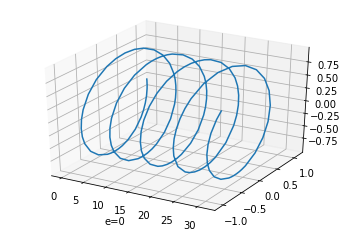

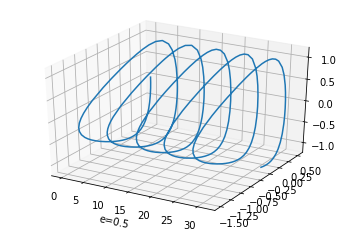

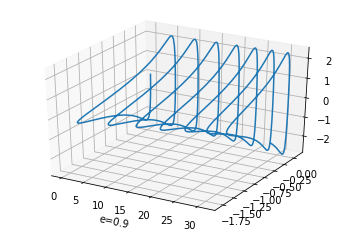

In [25]:
from mpl_toolkits import mplot3d
def Newton(t,Z):
    x0,x1,y0,y1=Z
    r=np.sqrt(x0**2+y0**2)
    f10=x1
    f11=-1*x0/(r**3)
    f20=y1
    f21=-1*y0/(r**3)    
    return [f10,f11,f20,f21]
e=0
ft=2*np.pi*5
x0=1-e
xdot0=0
y0=0
ydot0=np.sqrt((1+e)/(1-e))
sol1 = solve_ivp(Newton, [0, ft], [x0, xdot0, y0, ydot0],'BDF',rtol=.001)



plt.figure(7)
ax=plt.axes(projection='3d')
ax.plot3D(sol1.t,sol1.y[0,:],sol1.y[1,:])
plt.xlabel("e=0")
plt.show()

e=0.5
x0=1-e
xdot0=0
y0=0
ydot0=np.sqrt((1+e)/(1-e))
sol1 = solve_ivp(Newton, [0, ft], [x0, xdot0, y0, ydot0],'BDF',rtol=.001)
plt.figure(8)
ax=plt.axes(projection='3d')
ax.plot3D(sol1.t,sol1.y[0,:],sol1.y[1,:])
plt.xlabel("e=0.5")
plt.show()

e=0.9
x0=1-e
xdot0=0
y0=0
ydot0=np.sqrt((1+e)/(1-e))
sol1 = solve_ivp(Newton, [0, ft], [x0, xdot0,y0,ydot0],'BDF',rtol=.001)
plt.figure(9)
ax=plt.axes(projection='3d')
ax.plot3D(sol1.t,sol1.y[0,:],sol1.y[1,:])
plt.xlabel("e=0.9")
plt.show()